# ASSIGNMENT: VISUALIZATIONS OF QUANTITIES

### `Instructions`
_In this lesson, you worked with line charts, scatterplots, and bar charts to show interesting facts about this dataset. In this assignment, dig deeper into the dataset to discover a fact about a given type of bird. Create a notebook visualizing all the interesting data you can uncover about Snow Geese. Use the three plots mentioned above to tell a story in your notebook._



Let me import pandas, matplotlib and seaborn and then load and filter the `Dataset`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

birds = pd.read_csv(r"c:/users/danhaya/arewads/arewads-fellowship/arewads-machine-learning/data/birds.csv")
birds.head()


,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


filter the DataFrame to snoow goose only

In [4]:
snow_goose = birds[birds['Name'].str.lower().str.contains("snow goose")]
snow_goose

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0


let us visualize its body measurements using Lineplot

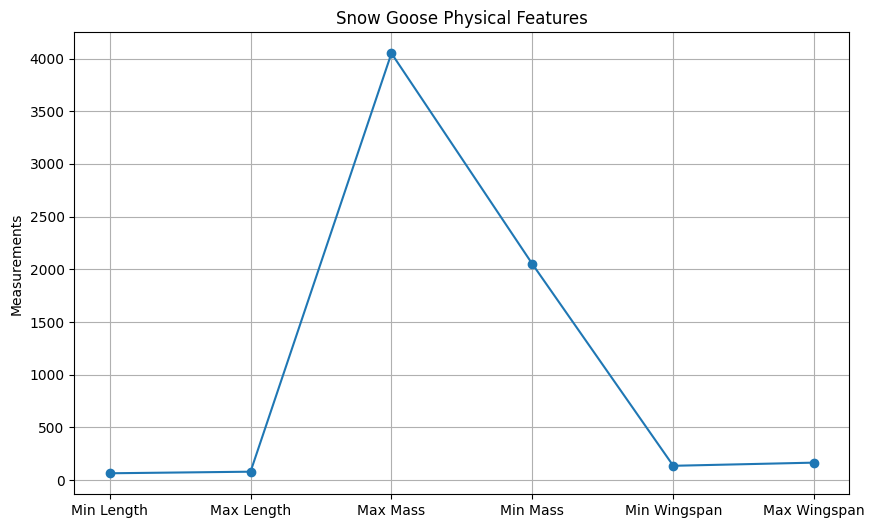

In [5]:
#Extract relevant features

features = ['MinLength', 'MaxLength', 'MaxBodyMass', 'MinBodyMass', 'MinWingspan', 'MaxWingspan']
values = snow_goose[features].values.flatten()

# Simplify labels
labels = ['Min Length', 'Max Length', 'Max Mass', 'Min Mass', 'Min Wingspan', 'Max Wingspan']

plt. figure(figsize=(10, 6))
plt.plot(labels, values, marker ='o', linestyle='-')
plt.title('Snow Goose Physical Features')
plt.ylabel('Measurements')
plt.grid(True)

plt.show()



From this plot, we can drive an insight that both min length and max length shared thesame value and also min wingspan and max wingspan share thesame value as well. 

`Comparison`: let's compare the wingspan to bosy mass

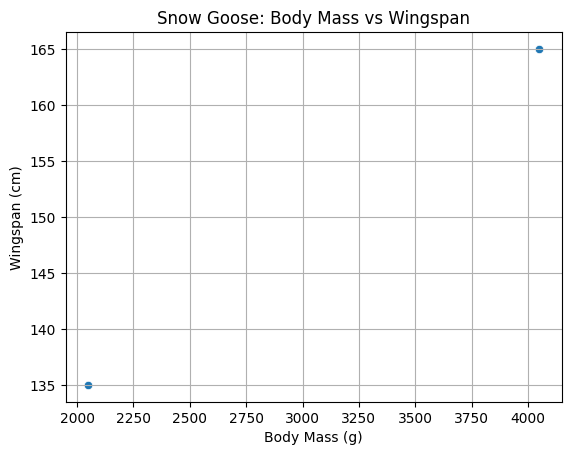

In [11]:
plot_data = pd.DataFrame({
    "Body Mass (g)" : [snow_goose['MinBodyMass'].values[0], snow_goose['MaxBodyMass'].values[0]],
    "Wingspan (cm)" : [snow_goose['MinWingspan'].values[0], snow_goose['MaxWingspan'].values[0]]
})

plt.Figure(figsize=((6,6)))
sns.scatterplot(data = plot_data, x= 'Body Mass (g)', y= 'Wingspan (cm)')
plt.title("Snow Goose: Body Mass vs Wingspan")
plt.grid(True)

plt.show()

we can't drive meaningful insight from this plot of the little amount of points we have. 

In [ ]:
# Convert the snow goose row into a long-form DataFrame

long_data = pd.DataFrame({
    "Features": ['Length', 'Body Mass', 'Wingspan'],
    "Min": [snow_goose['MinLength'].values[0], snow_goose['MinBodyMass'].values[0], snow_goose['MinWingspan'].values[0]],
    "Max": [snow_goose['MaxLength'].values[0], snow_goose['MaxBodyMass'].values[0], snow_goose['MaxWingspan'].values[0]]
})
print(long_data)

    Features     Min     Max
0     Length    64.0    79.0
1  Body Mass  2050.0  4050.0
2   Wingspan   135.0   165.0


In [16]:
# melt for seaborn
long_melted = pd.melt(long_data, id_vars='Features', value_vars=['Min', 'Max'], var_name = 'Type', value_name='Value')
print(long_melted)

    Features Type   Value
0     Length  Min    64.0
1  Body Mass  Min  2050.0
2   Wingspan  Min   135.0
3     Length  Max    79.0
4  Body Mass  Max  4050.0
5   Wingspan  Max   165.0


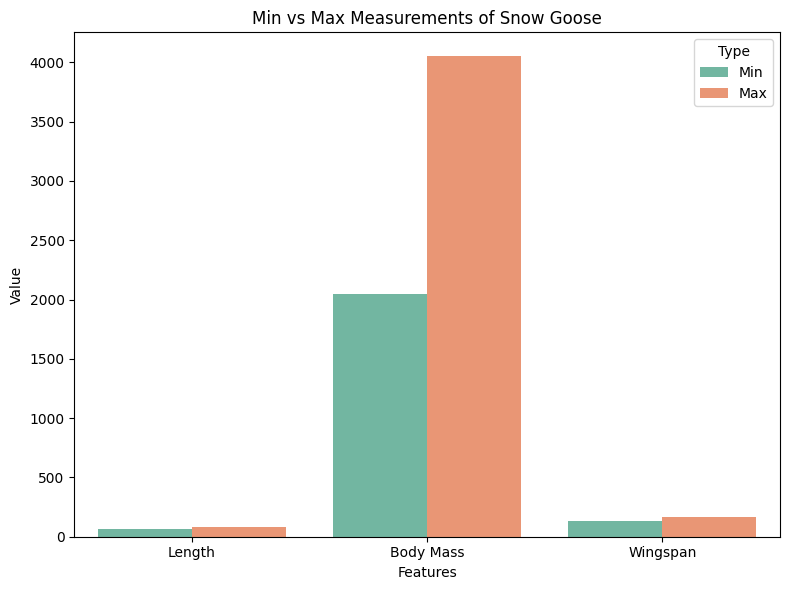

In [18]:
plt.figure(figsize=((8, 6)))
sns.barplot(
    data = long_melted,
    x = 'Features',
    y = 'Value',
    hue = 'Type',
    palette = 'Set2'
)
plt.title("Min vs Max Measurements of Snow Goose")
plt.tight_layout()

plt.show()

### `Conclusion`
The analysis of the snow goose's physical features using bar chart highlights important differences in scale among its body measurements. we cannot drive meaningful insight fro this graph alone because of difference in unit measurement.
